In [ ]:
#Standard packages
import numpy as np
import pandas as pd
import networkx as nx
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta


from matplotlib import rcParams
rcParams["font.size"] = 20
rcParams["axes.labelsize"] = 30
rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16
rcParams["figure.figsize"] = (8,6)

#Correlation matrix - Basic analysis

The correlation matrix of $N$ random variables stores the correlations among each pair of variables. In an investment scenario, we are interested in computing the correlation matrix of the assets under consideration. As we have seen so far, the assets are characterized by the time-series of its returns, so we will compute the correlation among the return time series.

Given $N$ assets, with their returns given by $Y_i(t_k)$  with $t_k=k\Delta t; \ k=1,\dots,n$; $i=1,\dots, N$, we define the elements of the correlation matrix as

\begin{equation}
C_{ij}=\frac{1}{n}\sum_{k=1}^n\tilde{Y}_i(t_k)\tilde{Y}_j(t_k) \quad \textrm{with} \quad \tilde{Y}_i(t_k)=\frac{Y_i(t_k)-\mu_{Y_i}}{\sigma_{Y_i}}
\end{equation}

where $\mu_{Y_i}=\left<Y_i\right>_T$ is the mean of the return time series and $\sigma_{Y_i}=\sqrt{\left<Y_i^2\right>_T-\left<Y_i\right>_T^2}$

Let's download stock price data for different assets and compute the correlation matrix. Keep in mind that assets belonging to the same sector are typically correlated (e.g., if there is a crisis, all banks lose value, if electrical cars become important, all oil companies lose value, etc). Here is a brief description of the assets we will use, to aid you in the discussion:

* AAPL – Apple Inc.  
Designs and manufactures consumer electronics, software, and digital services.  

* MSFT – Microsoft Corporation  
Develops software, cloud computing solutions, and enterprise technology services.  

* GOOGL – Alphabet Inc.  
Operates as a multinational technology conglomerate, offering services such as search, advertising, cloud computing, and consumer electronics.  

* INTC – Intel Corporation  
Designs and manufactures semiconductor products, including microprocessors and chipsets for computing and communications.  

* NVDA – NVIDIA Corporation  
Specializes in graphics processing units (GPUs) and AI computing technologies for gaming, data centers, and professional visualization.  

* CSCO – Cisco Systems, Inc.  
Provides networking hardware, software, and telecommunications equipment, focusing on Internet Protocol-based networking.  

* ADBE – Adobe Inc.  
Develops software for content creation and digital media, including products like Photoshop, Illustrator, and Acrobat.  

* ORCL – Oracle Corporation  
Offers database software and technology, cloud-engineered systems, and enterprise software products.  

* CRM – Salesforce, Inc.  
Provides customer relationship management software and applications focused on sales, customer service, and marketing automation.  

* JPM – JPMorgan Chase & Co.  
Provides financial services including investment banking, commercial banking, and asset management.  

* BAC – Bank of America Corporation  
Offers banking, investing, asset management, and other financial and risk management products and services.  

* WFC – Wells Fargo & Company  
Provides banking, investment, mortgage, and consumer and commercial finance services.  

* C – Citigroup Inc.  
Operates as a global financial services corporation, offering a range of financial products and services.  

* GS – The Goldman Sachs Group, Inc.  
Engages in investment banking, securities, and investment management services.  

* MS – Morgan Stanley  
Provides financial services including investment banking, wealth management, and institutional securities.  

* USB – U.S. Bancorp  
Offers a range of financial services, including lending, depository services, and payment services.  

* XOM – Exxon Mobil Corp.  
Engages in the exploration, production, and sale of crude oil, natural gas, and petroleum products.  

* UNH – UnitedHealth Group Inc.  
Operates as a diversified healthcare and insurance company.  

* PFE – Pfizer Inc.  
Develops and produces medicines and vaccines for a wide range of medical disciplines.  

* VZ – Verizon Communications Inc.  
Provides communications, information, and entertainment products and services, including wireless and wireline services.  

* HAS – Hasbro, Inc.  
Engages in the provision of children's and family leisure time products and services, including toys and games.  

* SAP.DE – SAP SE  
Develops enterprise application software for business operations and customer relations.  

* ASML.AS – ASML Holding N.V.  
Manufactures photolithography equipment for the semiconductor industry.  

* MC.PA – LVMH Moët Hennessy Louis Vuitton  
Operates in the luxury goods sector, producing fashion, wines, spirits, and cosmetics.  

* RWE.DE – RWE AG  
Generates and distributes electricity, with a focus on renewable and conventional energy.  

* SIE.DE – Siemens AG  
Operates as a global technology company focusing on automation, digitalization, and electrification.  

* ULVR.L – Unilever PLC  
Produces and sells consumer goods, including foods, beverages, cleaning agents, and personal care products.  

* NESN.SW – Nestlé S.A.  
Engages in the manufacturing and sale of food and beverage products, including baby food, bottled water, cereals, and coffee.  

* SAN.MC – Banco Santander  
A multinational bank offering retail and commercial banking services.  

* BBVA.MC – Banco Bilbao Vizcaya Argentaria, S.A.  
Provides retail banking, asset management, private banking, and wholesale banking services.  

* IBE.MC – Iberdrola  
An electric utility company focusing on renewable energy and power distribution.  

* GRF.MC – Grifols  
Specializes in the production of plasma-derived medicines and healthcare solutions.  

* FER.MC – Ferrovial  
Operates infrastructure projects including highways, airports, and urban services.  

* REP.MC – Repsol S.A.  
Operates as an integrated energy company, engaging in exploration, production, refining, and marketing of oil and natural gas.  


# Exercise 1

(a) Download the prices of all the listed assets from 2006-06-01 to 2025-04-16. Compute the correlation matrix of log-returns and visualize it.
*Indication: the dates are chosen to avoid NaNs as much as possible. However, to be safe, use dropna right after extracting the Close columns.*

*Clue: to plot matrices, you can use the `heatmap` method included in the seaborn library: sns.heatmap(matrix)*.

(b) Find the five pairs of stocks with the maximum correlation and the five pairs of stocks with the minimum correlation. Format this information in two table with columns: Stock1, Stock2, Correlation.

*Indication: you need to remove the trivial correlations between each asset and itself, and the duplication arising from the symmetry of the correlation matrix. Proably the easiest way to do this is to create a mask that selects only the upper triangular part of the correlation matrix, for example, `mask = np.triu(np.ones(...), k=1).astype(bool)`. k=1 removes the diagonal, creating a strictly upper triangular matrix.*

(c) Compute the histogram of correlations (again, remove duplicates and trivial correlations).




In [ ]:
tickers = [
    "AAPL", "MSFT", "GOOGL", "INTC", "NVDA", "CSCO", "ADBE", "ORCL", "CRM",
    "JPM", "BAC", "WFC", "C", "GS", "MS", "USB", "XOM", "UNH", "PFE", "VZ", "HAS",
    "SAP.DE", "ASML.AS", "MC.PA", "RWE.DE", "SIE.DE", "ULVR.L", "NESN.SW",
    "SAN.MC", "BBVA.MC", "IBE.MC", "GRF.MC", "FER.MC", "REP.MC"
]

data = yf.download(tickers, start="2006-06-01", end="2025-04-16")['Close'].dropna()


[*********************100%***********************]  34 of 34 completed


# Exercise 2

This is a continuation of Exercise 1. Now we will focus on the temporal evolution of the correlations.

(a) Plot the average correlation of the portfolio as a function of time, using a window of 100 days. How do correlations react to economical crises?

*Clue: you need to iteratively roll around the dataframe, taking one window at each time step. To get the window, you can use the iloc method: window_data = log_returns.iloc[...]. Remember to filter out duplicates and trivial correlations!*


(b) Plot also the correlation coefficient of the two most correlated assets as a function of time (use your results from Exercise 1).

# The Minimum Spanning Tree method for Correlation Networks



The Minimum Spanning Tree (MST) method is a technique used to extract the most relevant structure from a full correlation matrix of financial assets. It builds a sparse network that preserves the strongest and most essential connections and removes redundant or noisy links. Typically, the tree that is return has branches that allow researchers to identify financial sectors in a data-driven way, which can complement traditional classifications.

To better understand the MST, let us introduce some terms: a **graph** is a mathematical structure used to model pairwise relationships between objects. It consists of nodes (or vertices), which represent entities such as financial assets, and edges, which connect pairs of nodes and represent relationships between them, like correlation or distance. A **tree** is a special type of graph that is connected and contains no cycles. In a tree with n nodes, there are exactly n − 1 edges. Among all possible trees that can be formed from a weighted graph, the **minimum spanning tree** is the one that connects all nodes with the lowest possible total edge weight. **The adjacency matrix** $A$ is a mathematical representation of the graph structure: if nodes $i$ and $j$ are connected by an edge of weight $w$, then the adjacency matrix elements $A_{ij}$ and $A_{ji}$ are set to be equal to $w$. If there is no edge between $i$ and $j$, then $A_{ij}=A_{ji}=0$.

The algorithm to get the MST has three main steps:

1. **Compute the correlation matrix $\rho$** between asset returns.
2. **Transform correlations into distances** using  $ d_{ij} = \sqrt{2(1 - \rho_{ij})}   $. The resulting distance will be interpreted as the adjacency matrix of a weighted complete graph, with distances as edge weights.
3. **Extract the minimum spanning tree**, which connects all nodes with the minimum sum of distances and no cycles.

The result is a graph that reveals the core topology of market relationships.



To compute spanning trees, we will use networkx, which is the python library dedicated to working with graphs and networks. Since you have proably never seen it, let's see how it works with a simple example. We will first create a weighted complete graph from a synthetic distance matrix d (later you will have to do this with distances between real assets):

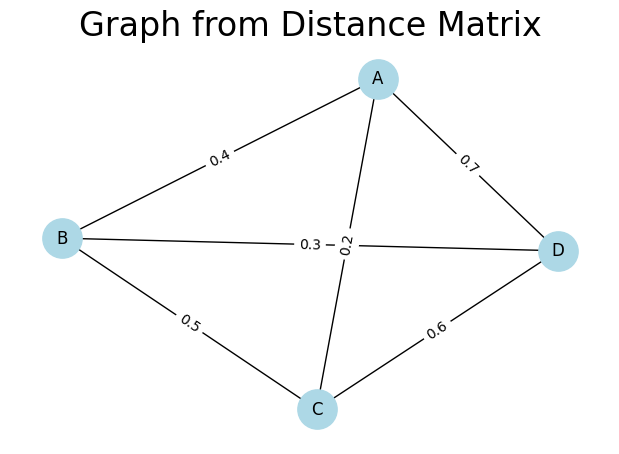

In [ ]:

# A small symmetric distance matrix for 4 synthetic assets
dist_matrix = np.array([
    [0.0, 0.4, 0.2, 0.7],
    [0.4, 0.0, 0.5, 0.3],
    [0.2, 0.5, 0.0, 0.6],
    [0.7, 0.3, 0.6, 0.0]
])

labels = ['A', 'B', 'C', 'D']

# Create a graph from the distance matrix
G = nx.Graph()  # this creates a Graph object, which we will now fill in with stuff
for i in range(len(labels)):
    for j in range(i+1, len(labels)):
        G.add_edge(labels[i], labels[j], weight=dist_matrix[i, j])

# Draw the full graph with weights
pos = nx.spring_layout(G, seed=1)  # this creates a dictionary with node positions: {node: (x_coordinate, y_coordinate)}
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Graph from Distance Matrix")
plt.show()

Now that you have a weighted graph, you can extract its Minimum Spanning Tree. This tree connects all nodes using only the most relevant edges, avoiding cycles and minimizing total distance.

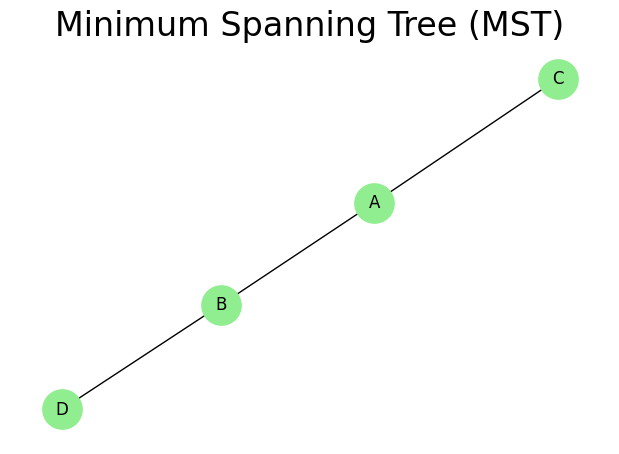

In [ ]:
# Compute the MST
mst = nx.minimum_spanning_tree(G, weight='weight')

# Visualize the MST
plt.figure(figsize=(6, 4))
nx.draw(mst, with_labels=True, node_color='lightgreen', node_size=800)
plt.title("Minimum Spanning Tree (MST)")
plt.show()


A **dendrogram** is a tree diagram that shows how assets cluster together based on their pairwise distances. While the MST connects assets with minimum total distance, the dendrogram tells you how and when those connections happen in a hierarchical way.


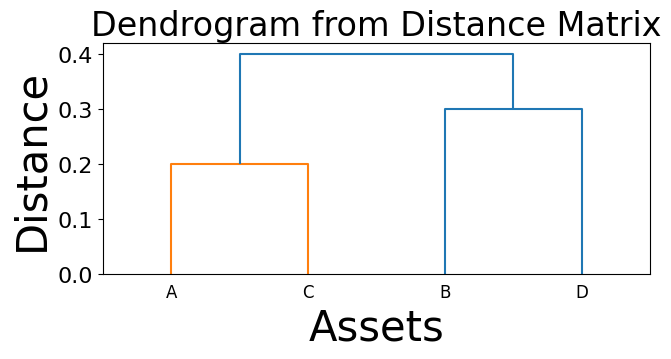

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# scipy expects a condensed distance matrix: keep only the upper triangle of the matrix
condensed_dist = squareform(dist_matrix)

# Compute linkage for hierarchical clustering
link = linkage(condensed_dist, method='single')  # "single" linkage relates closely to MST

# Plot the dendrogram
plt.figure(figsize=(7, 4))
dendrogram(link, labels=labels)
plt.title("Dendrogram from Distance Matrix")
plt.xlabel("Assets")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


# Exercise 3

Using the correlation matrix from Exercise 1, extract the pairwise distance matrix between assets. Then, following the example we just saw, compute and plot the Minimum Spanning Tree and the associated dendrogram. Discuss **in detail** the results you obtain. Can you find an intuitive reason why asssets are getting clumped in the same or different branches?

**Optional**: a typical network metric is the average path length between all nodes. In the MST, this provides a measure of the diversification on the tree. Compute the MST for different years (using only the data corresponding to that year), and compute their average path length.  Plot the average path length as a function of time.

**Optional**: note that the linkage function admits a 'method' variable that we have set to single. This variable determines how the dendrogram detemines the distance between an isolated asset and a branch or clustr. The single method uses the minimum of the distances, like the MST. Explore other possible linkage methods, describe what they do, and recompute the dendrogram for these methods. Which method gives the best performance?